The project aims to detect the class of melanoma using deep learning techniques.
Martin Cornen

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pathlib
import tensorflow as tf
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

In [31]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [32]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/Users/martin/Desktop/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/Users/martin/Desktop/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Test")


In [33]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [34]:
batch_size = 32
img_height = 180
img_width = 180

In [35]:
## Write your train dataset here
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    label_mode='categorical',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [36]:
# List out all the classes of skin cancer and store them in a list. 
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


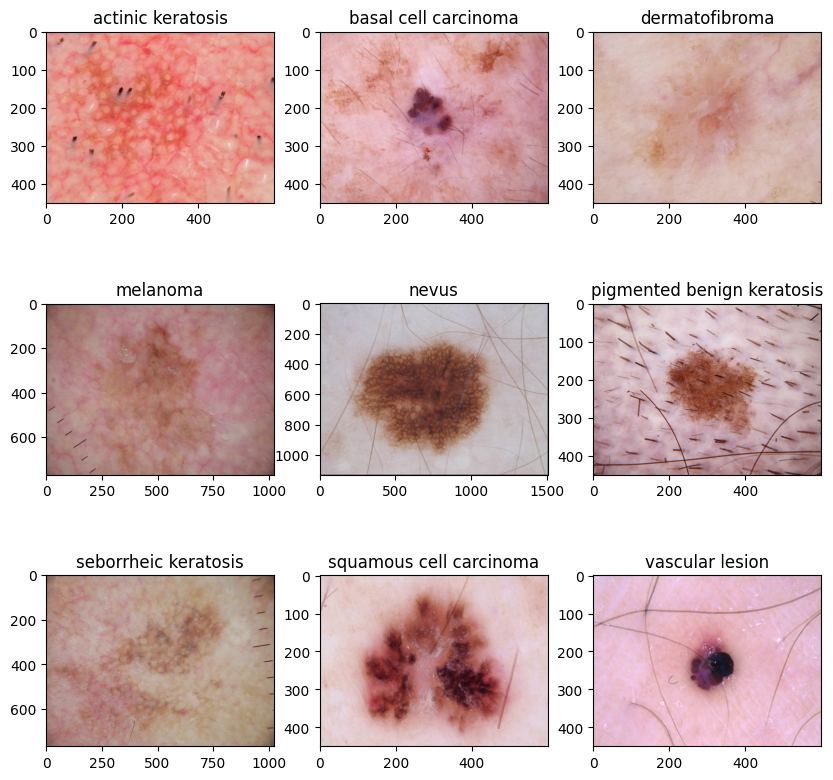

In [37]:
 # Visualize the data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [38]:
# using autotune for better transfer learning
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [39]:
def class_distribution_count(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,melanoma,438
1,pigmented benign keratosis,462
2,nevus,357
3,basal cell carcinoma,376
4,actinic keratosis,114
5,squamous cell carcinoma,181
6,vascular lesion,139
7,seborrheic keratosis,77
8,dermatofibroma,95


<Axes: xlabel='No. of Image', ylabel='Class'>

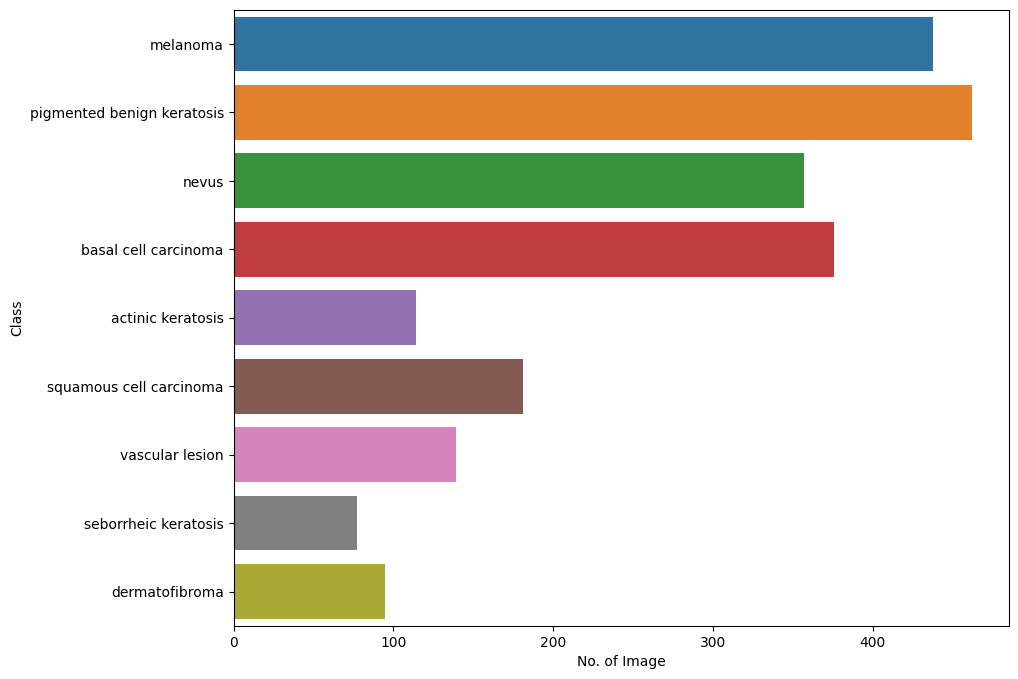

In [40]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

In [46]:
path_to_training_dataset =  pathlib.Path("/Users/martin/Desktop/Melanoma/Skin cancer ISIC The International Skin Imaging Collaboration/Train")

import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset / i), output_directory='/Users/martin/Desktop/Melanoma/Result/'+i+'/output/')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(800) ## We are adding 1000 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /Users/martin/Desktop/Melanoma/Result/actinic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28D3E1C90>: 100%|██████████| 800/800 [00:03<00:00, 253.79 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to /Users/martin/Desktop/Melanoma/Result/basal cell carcinoma/output/.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x28D44B710>: 100%|██████████| 800/800 [00:02<00:00, 267.99 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /Users/martin/Desktop/Melanoma/Result/dermatofibroma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x288B0A050>: 100%|██████████| 800/800 [00:03<00:00, 260.24 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to /Users/martin/Desktop/Melanoma/Result/melanoma/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x2890B3810>: 100%|██████████| 800/800 [00:16<00:00, 49.71 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to /Users/martin/Desktop/Melanoma/Result/nevus/output/.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x288FCBB90>: 100%|██████████| 800/800 [00:12<00:00, 63.96 Samples/s]                     


Initialised with 462 image(s) found.
Output directory set to /Users/martin/Desktop/Melanoma/Result/pigmented benign keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28C922DD0>: 100%|██████████| 800/800 [00:03<00:00, 256.97 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to /Users/martin/Desktop/Melanoma/Result/seborrheic keratosis/output/.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x288F119D0>: 100%|██████████| 800/800 [00:07<00:00, 112.73 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to /Users/martin/Desktop/Melanoma/Result/squamous cell carcinoma/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28D441A10>: 100%|██████████| 800/800 [00:03<00:00, 250.72 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to /Users/martin/Desktop/Melanoma/Result/vascular lesion/output/.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2883328D0>: 100%|██████████| 800/800 [00:03<00:00, 248.40 Samples/s]                  


In [50]:
# Saving our final result in output_dir
output_dir = pathlib.Path("/Users/martin/Desktop/Melanoma/Result/")

In [51]:
# lets again creating the train dataset
train_ds_new = tf.keras.preprocessing.image_dataset_from_directory(
  output_dir,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7200 files belonging to 9 classes.
Using 5760 files for training.


In [56]:
# using autotune again
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds_new = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [63]:
from keras.applications.vgg16 import VGG16

In [64]:
base_model=VGG16(include_top=False, weights='imagenet',input_shape=(180,180,3), pooling='avg')

In [65]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [66]:
model=Sequential()
model.add(base_model)
for layer in base_model.layers[15:]:
    layer.trainable=True
for layer in base_model.layers[0:15]:
    layer.trainable=False
model.add(layers.Dense(512, activation="tanh"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="tanh"))
model.add(layers.Dense(len(class_names),activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 15,244,617
Trainable params: 7,609,353
Non-trainable params: 7,635,264
_________________________________________________________________


In [67]:
#optimiser and loss function
model.compile(optimizer='sgd', loss="categorical_crossentropy",metrics=["accuracy"])

In [68]:
epochs = 5
history = model.fit(train_ds_new,validation_data=val_ds_new,epochs=epochs)

Epoch 1/5
180/180 [==============================] - 634s 4s/step - loss: 2.0029 - accuracy: 0.2852 - val_loss: 1.6026 - val_accuracy: 0.3982
Epoch 2/5
180/180 [==============================] - 806s 4s/step - loss: 1.3422 - accuracy: 0.5167 - val_loss: 1.1090 - val_accuracy: 0.5884
Epoch 3/5
180/180 [==============================] - 754s 4s/step - loss: 0.8733 - accuracy: 0.6894 - val_loss: 0.8685 - val_accuracy: 0.6644
Epoch 4/5
180/180 [==============================] - 760s 4s/step - loss: 0.5943 - accuracy: 0.7915 - val_loss: 0.5744 - val_accuracy: 0.8031
Epoch 5/5
180/180 [==============================] - 806s 4s/step - loss: 0.3538 - accuracy: 0.8814 - val_loss: 0.4662 - val_accuracy: 0.8680


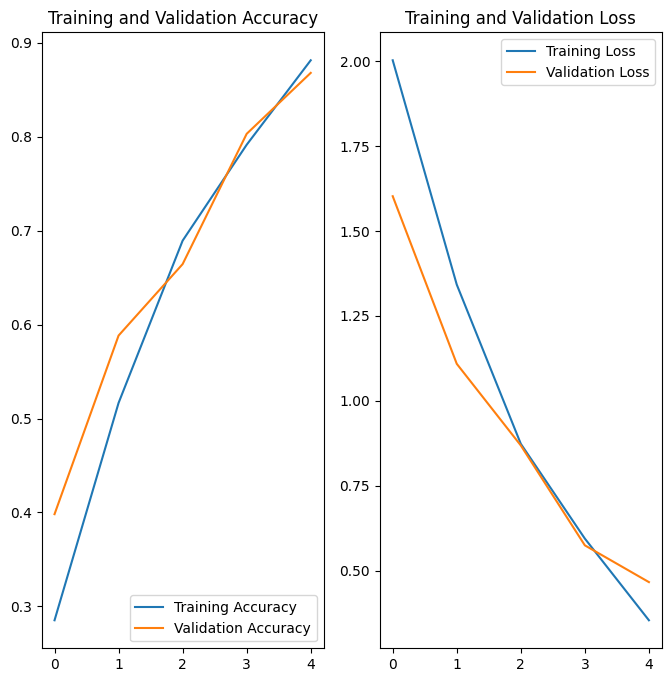

In [69]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 83ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


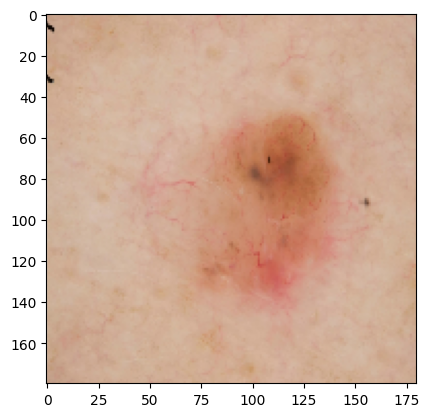

In [77]:
# lets see how our data is perfoming on the test datset
from tensorflow.keras.preprocessing.image import load_img
from glob import glob
Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[9],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class "+ class_names[1] +'\n'+ "Predictive Class "+pred_class )

In [78]:
#saving the model
model.save('model_melanoma.h5')